In [3]:
from PIL import Image
from google.colab import files
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [67]:
masked = files.upload()

Saving 000 (2).jpg to 000 (2).jpg
Saving 000 (3).jpg to 000 (3).jpg
Saving 000 (4).jpg to 000 (4).jpg
Saving 000 (5).jpg to 000 (5).jpg
Saving 000 (6).jpg to 000 (6).jpg
Saving 000 (7).jpg to 000 (7).jpg
Saving 000 (8).jpg to 000 (8).jpg
Saving 000.jpg to 000.jpg
Saving 001 (2).jpg to 001 (2).jpg
Saving 001 (3).jpg to 001 (3).jpg
Saving 001 (4).jpg to 001 (4).jpg
Saving 001 (5).jpg to 001 (5).jpg
Saving 001 (6).jpg to 001 (6).jpg
Saving 001 (7).jpg to 001 (7).jpg
Saving 001 (8).jpg to 001 (8).jpg
Saving 001.jpg to 001.jpg
Saving 002 (2).jpg to 002 (2).jpg
Saving 002 (3).jpg to 002 (3).jpg
Saving 002 (4).jpg to 002 (4).jpg
Saving 002 (5).jpg to 002 (5).jpg
Saving 002 (6).jpg to 002 (6).jpg
Saving 002 (7).jpg to 002 (7).jpg
Saving 002.jpg to 002.jpg
Saving 003 (2).jpg to 003 (2).jpg
Saving 003 (3).jpg to 003 (3).jpg
Saving 003.jpg to 003.jpg
Saving 004 (2).jpg to 004 (2).jpg
Saving 004 (3).jpg to 004 (3).jpg
Saving 004.jpg to 004.jpg
Saving 005 (2).jpg to 005 (2).jpg
Saving 005.jpg to 00

In [123]:
unmasked = files.upload()

Saving download (1).jpg to download (1).jpg
Saving download (2).jpg to download (2).jpg
Saving download (3).jpg to download (3).jpg
Saving download.jpg to download.jpg
Saving images (1).jpg to images (1).jpg
Saving images (2).jpg to images (2).jpg
Saving images (3).jpg to images (3).jpg
Saving images (4).jpg to images (4).jpg
Saving images (5).jpg to images (5).jpg
Saving images (6).jpg to images (6).jpg
Saving images (7).jpg to images (7).jpg
Saving images (8).jpg to images (8).jpg
Saving images (9).jpg to images (9).jpg
Saving images (10).jpg to images (10).jpg
Saving images (11).jpg to images (11).jpg
Saving images (12).jpg to images (12).jpg
Saving images (13).jpg to images (13).jpg
Saving images (14).jpg to images (14).jpg
Saving images (15).jpg to images (15).jpg
Saving images (16).jpg to images (16).jpg
Saving images (17).jpg to images (17).jpg
Saving images (18).jpg to images (18).jpg
Saving images (19).jpg to images (19).jpg
Saving images.jpg to images.jpg


In [127]:
len(ls)

57

In [137]:
#Creating masked dataset
ls=[]
for i in list(masked.keys()):
  mask=Image.open(i).resize((224,224), Image.ANTIALIAS)
  pix = np.array(mask)
  ls.append(pix)

In [138]:
train_data = np.array(ls)
train_label = np.ones(len(train_data))

In [139]:
#Creating unmasked dataset and combining
for i in list(unmasked.keys()):
  unmask=Image.open(i).resize((224,224), Image.ANTIALIAS)
  pix = np.array(unmask)
  ls.append(pix)

In [140]:
train_data = np.array(ls)
train_label = np.append(train_label,np.zeros(len(unmasked.keys())))

In [146]:
train_label.shape[0]== train_data.shape[0]

True

0.0


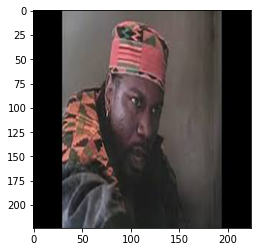

In [148]:
print(train_label[55])
plt.imshow(train_data[55])

In [149]:
from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D,
         kernel_size=3, activation='relu', padding="SAME")

# tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME")

model = tf.keras.models.Sequential([
         DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
         tf.keras.layers.MaxPooling2D(pool_size=2),
         DefaultConv2D(filters=128),
         DefaultConv2D(filters=128),
         tf.keras.layers.MaxPooling2D(pool_size=2),
         DefaultConv2D(filters=256),
         DefaultConv2D(filters=256),
         tf.keras.layers.MaxPooling2D(pool_size=2),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(units=128, activation='relu'),
         tf.keras.layers.Dropout(0.5),
         tf.keras.layers.Dense(units=64, activation='relu'),
         tf.keras.layers.Dropout(0.5),
         tf.keras.layers.Dense(units=10, activation='softmax'),
])

In [150]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 256)         5

In [151]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None, pooling=None)

In [17]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [152]:
layer_index = 1
weights = np.array(vgg16_model.get_layer(index=layer_index).get_weights()[0])
print(layer_index, vgg16_model.get_layer(index=layer_index))
weights.shape

1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f182105b668>


(3, 3, 3, 64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


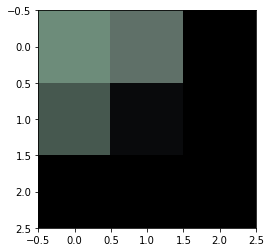

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


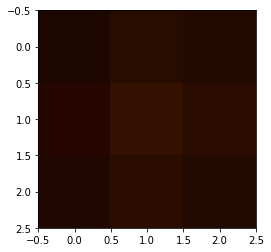

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


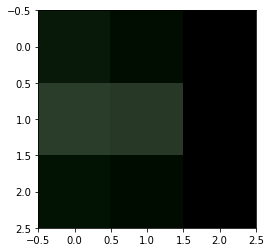

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


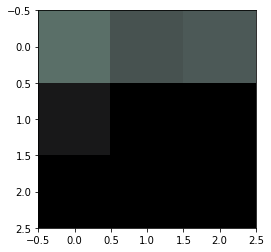

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


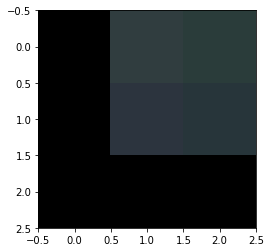

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


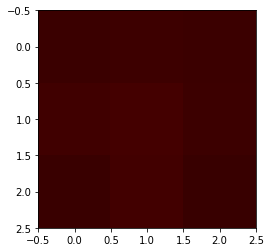

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


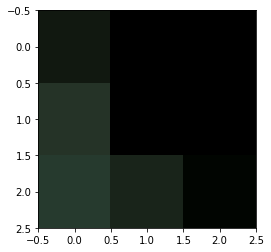

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


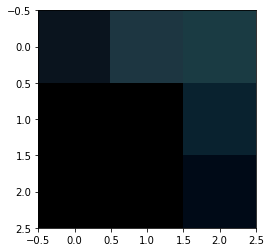

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


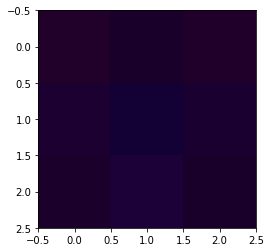

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


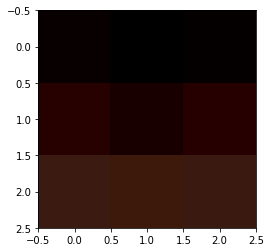

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


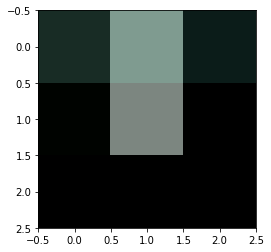

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


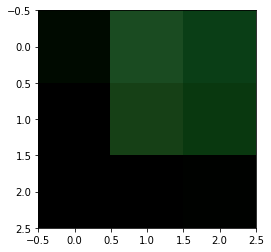

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


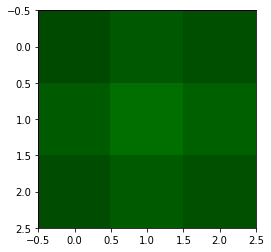

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


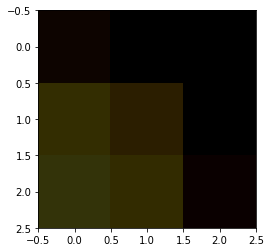

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


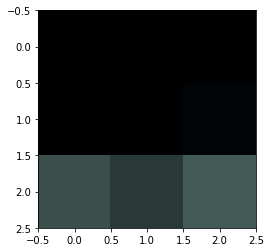

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


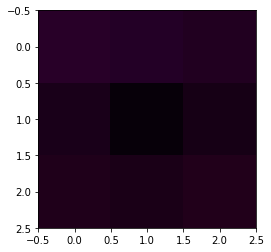

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


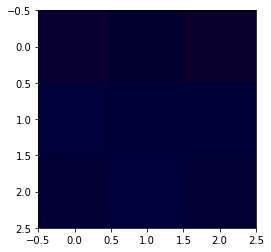

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


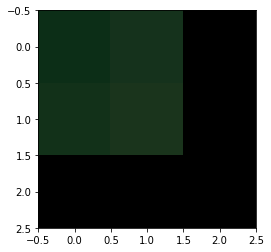

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


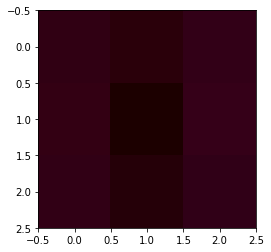

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


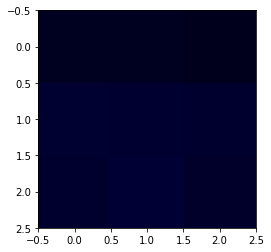

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


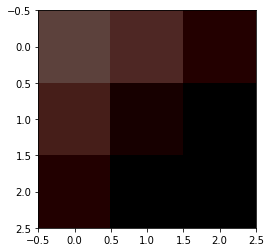

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


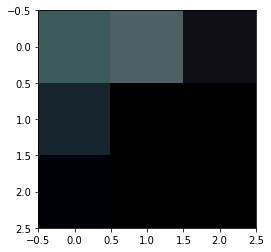

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


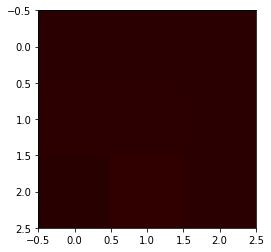

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


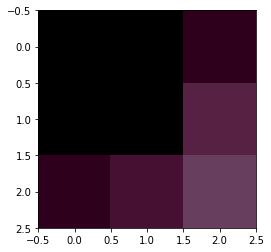

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


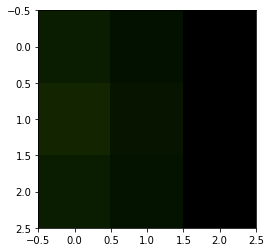

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


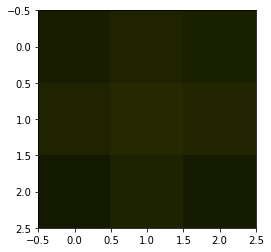

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


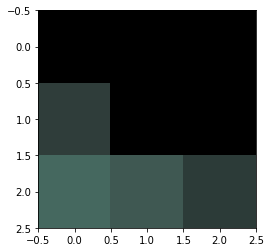

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


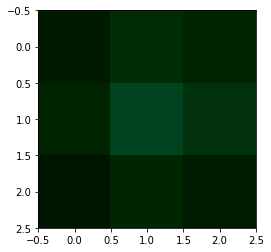

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


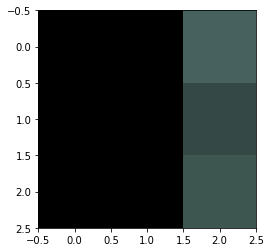

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


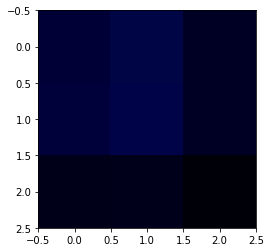

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


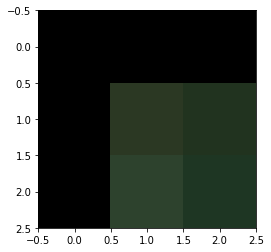

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


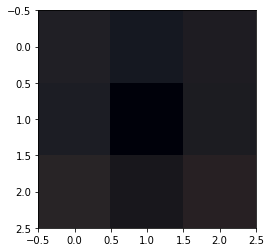

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


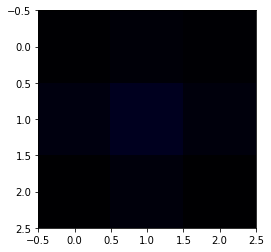

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


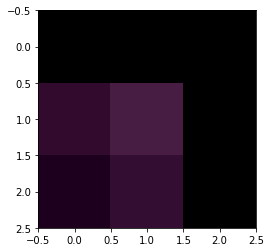

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


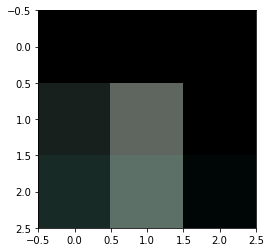

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


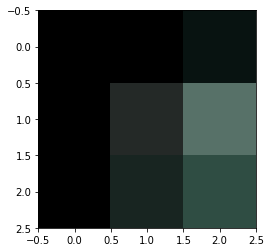

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


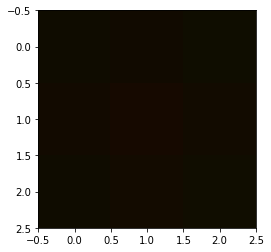

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


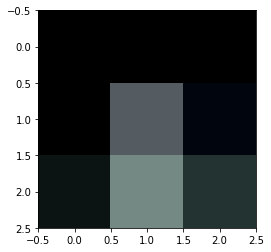

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


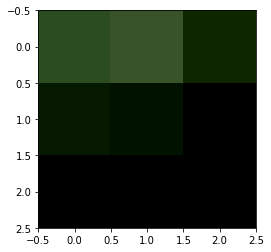

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


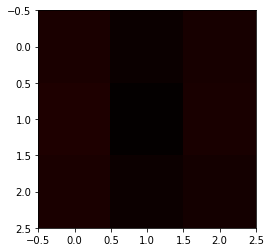

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


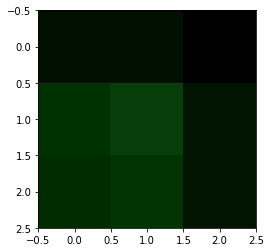

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


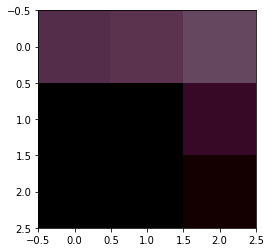

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


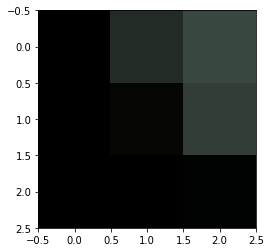

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


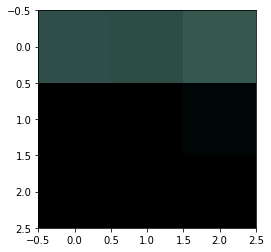

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


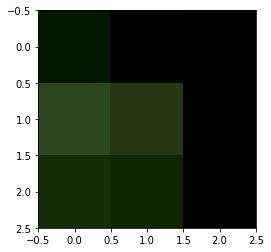

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


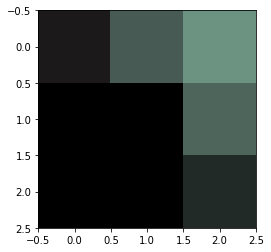

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


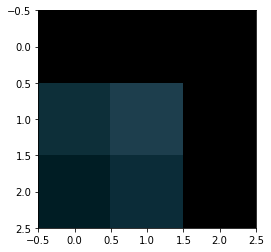

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


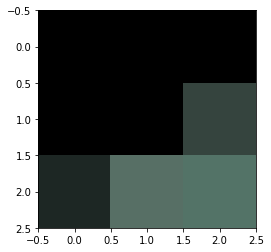

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


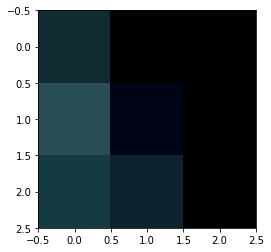

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


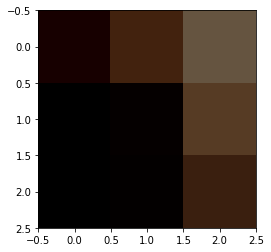

In [19]:
for i in range(50):
    filters=weights[:,:,:,i]
    plt.imshow(filters)
    plt.show()

In [153]:
int_layer_index = 1
intermediate_layer_model = tf.keras.models.Model(inputs=vgg16_model.inputs,
                                 outputs=vgg16_model.get_layer(index=int_layer_index).output)
print(layer_index, vgg16_model.get_layer(index=int_layer_index))


1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f182105b668>


In [89]:
intermediate_layer_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


In [156]:
intermediate_output = intermediate_layer_model.predict(preprocessed)

NameError: ignored

In [23]:
intermediate_output.shape

(1, 224, 224, 64)

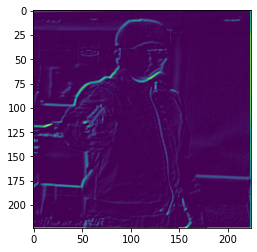

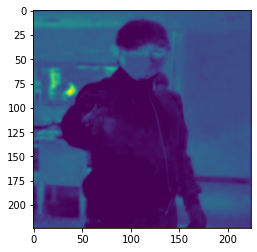

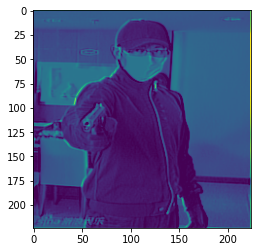

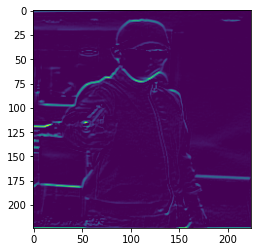

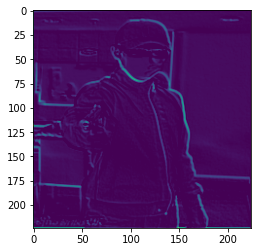

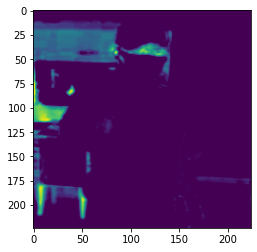

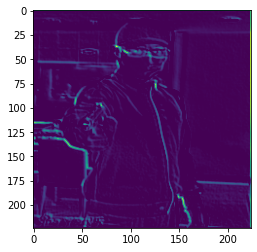

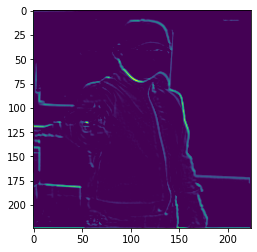

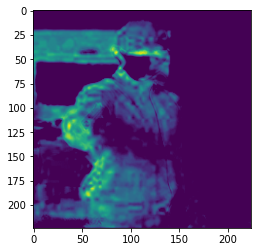

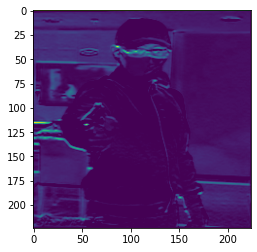

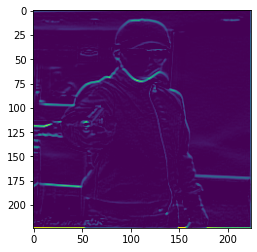

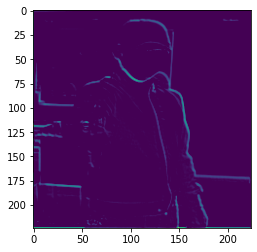

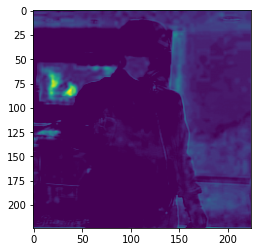

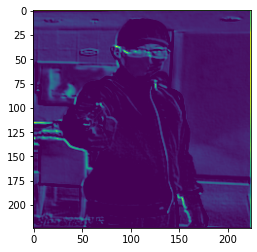

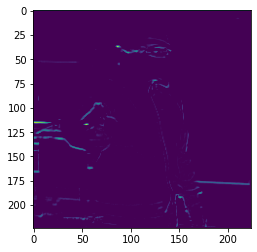

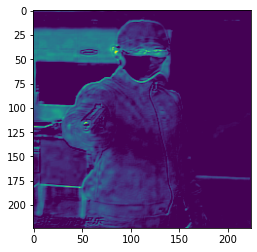

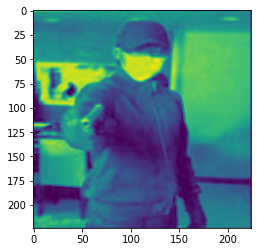

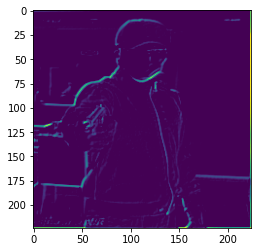

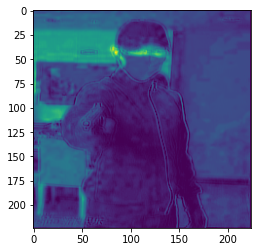

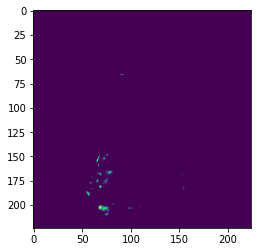

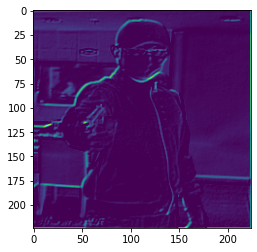

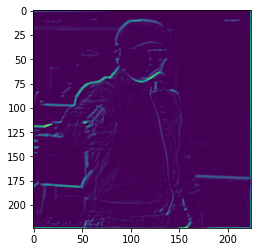

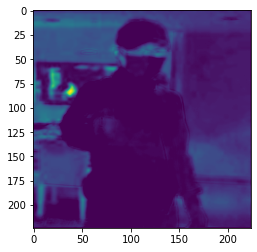

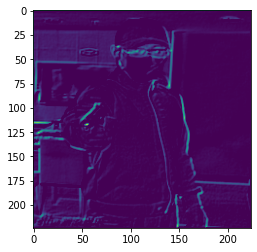

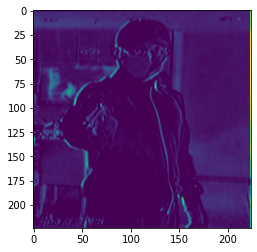

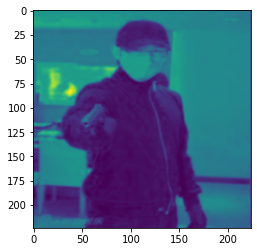

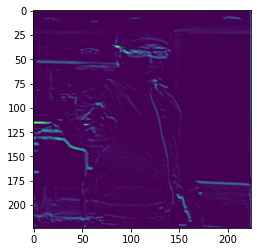

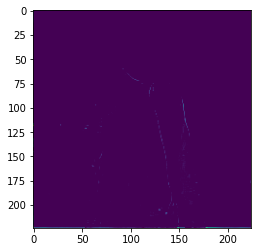

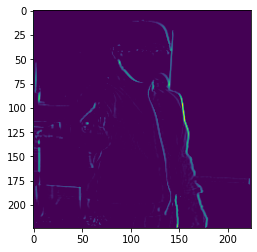

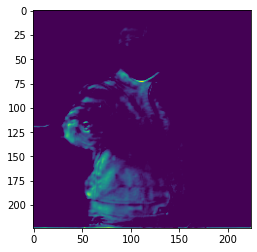

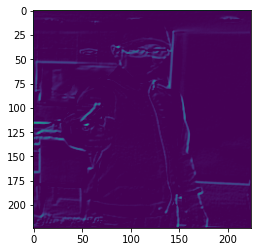

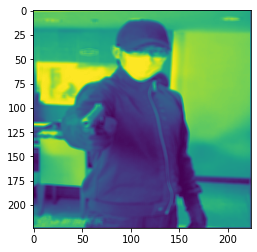

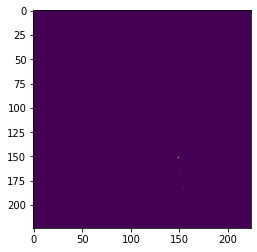

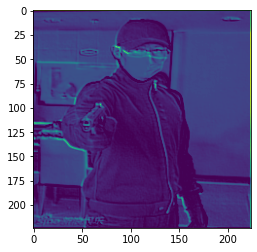

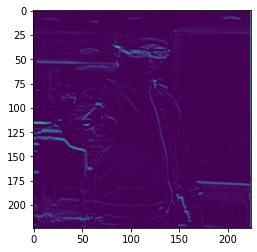

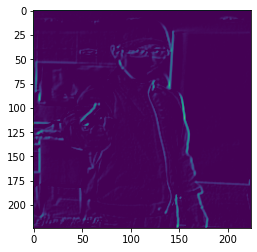

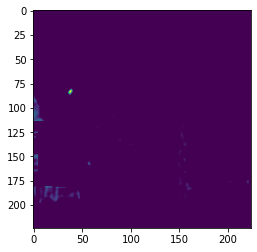

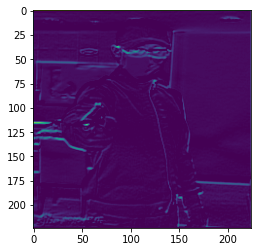

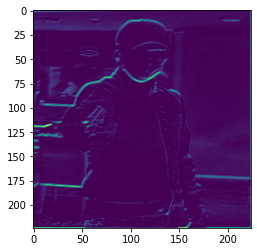

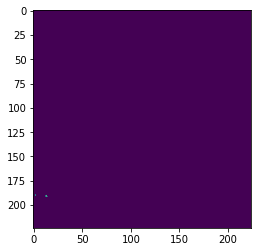

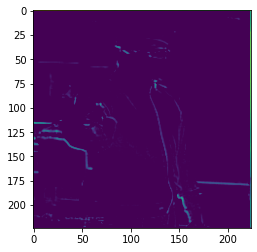

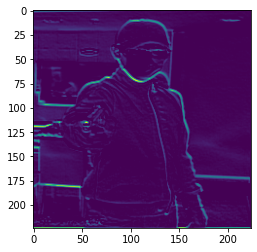

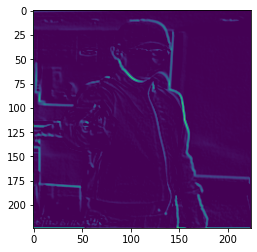

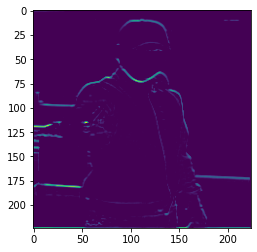

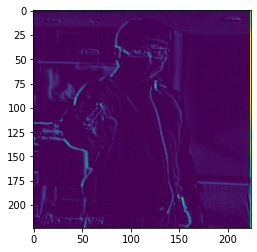

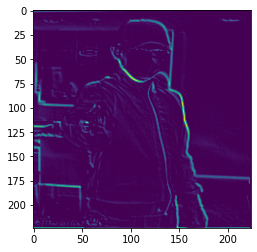

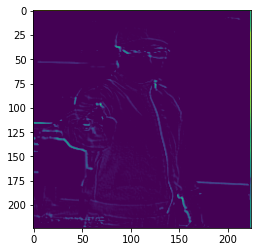

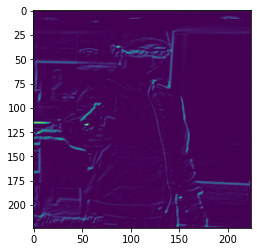

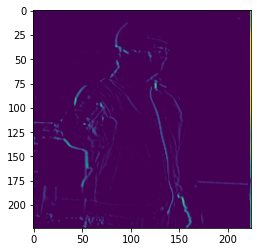

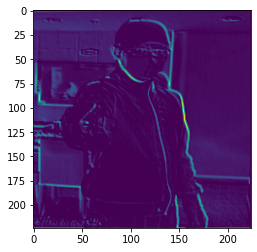

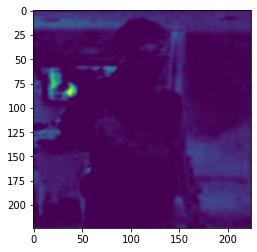

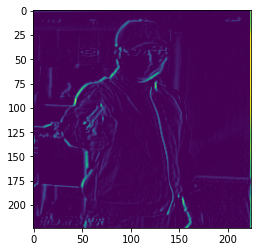

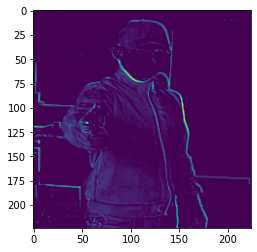

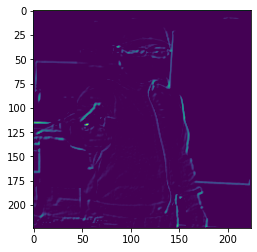

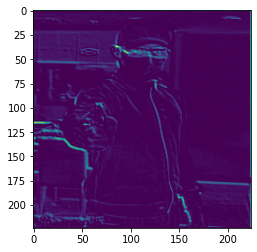

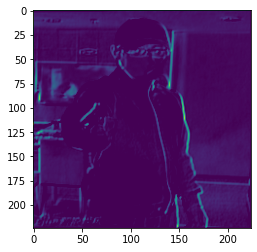

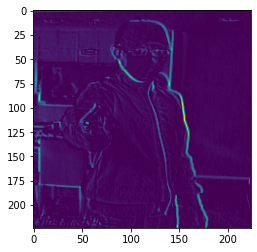

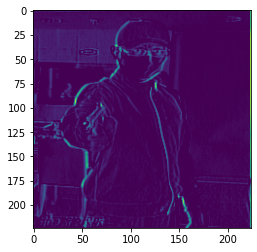

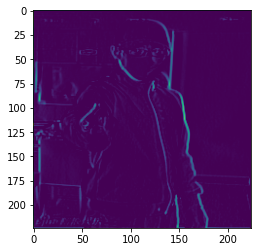

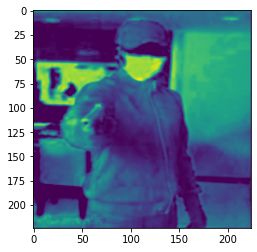

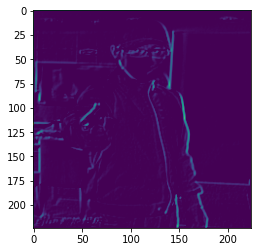

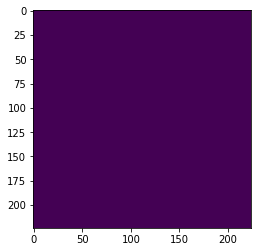

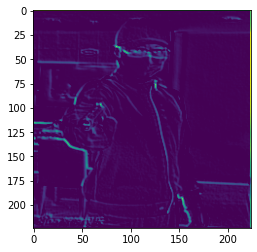

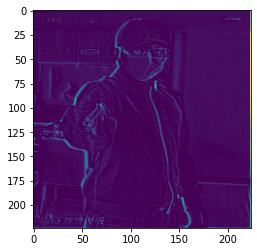

In [100]:
for i in range(64):
    first_conv_layer_output=intermediate_output[0,:,:,i]
    plt.imshow(first_conv_layer_output)
    plt.show()

In [26]:
fc_input = vgg16_model.predict(processed_image)

In [27]:
fc_input.shape

(1, 7, 7, 512)

In [36]:
import pandas as pd

In [43]:
data = pd.read_csv('https://raw.githubusercontent.com/UniversalDataTool/coronavirus-mask-image-dataset/master/mask_labels.udt.csv')
data.to_csv('mask.csv')

In [32]:
from tensorflow import keras

In [50]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [116]:
train_data.shape

(33, 1, 224, 224, 3)

In [117]:
train_images.shape

(60000, 28, 28)

In [35]:
model = keras.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(514,activation='tanh'),
        keras.layers.Dropout(0.2),
        #removing BN 
        keras.layers.Dense(10,activation='softmax')
    ])
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
model.fit(np.array(fc_input), np.array([1]), epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 2.1906 - accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 1ms/step - loss: 7.4133e-04 - accuracy: 1.0000
Epoch 3/50
1/1 [==============================] - 0s 1ms/step - loss: 7.8611e-04 - accuracy: 1.0000
Epoch 4/50
1/1 [==============================] - 0s 1ms/step - loss: 3.7377e-04 - accuracy: 1.0000
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 4.2795e-05 - accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 5.2928e-05 - accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 4.7206e-05 - accuracy: 1.0000
Epoch 8/50
1/1 [==============================] - 0s 2ms/step - loss: 1.0716e-04 - accuracy: 1.0000
Epoch 9/50
1/1 [==============================] - 0s 1ms/step - loss: 9.0599e-06 - accuracy: 1.0000
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 4.2914e-05 - accuracy: 1.0000

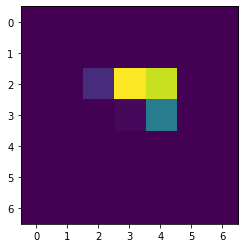

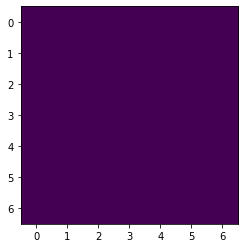

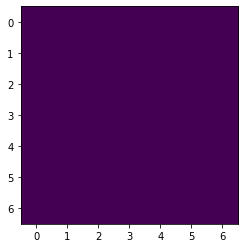

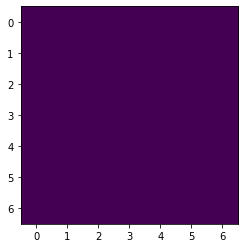

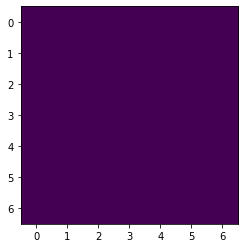

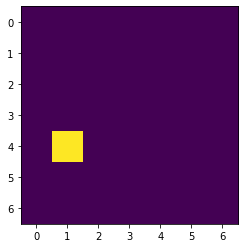

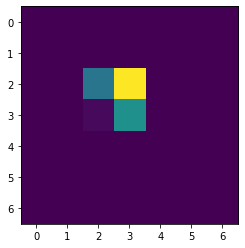

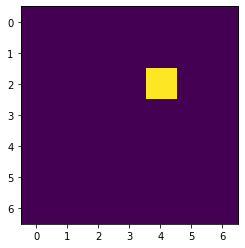

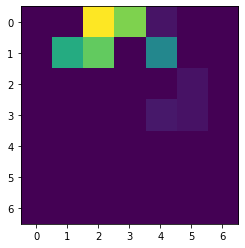

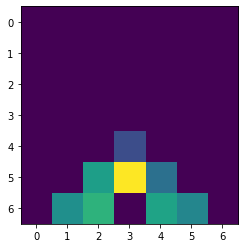

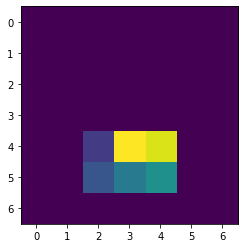

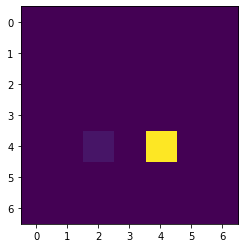

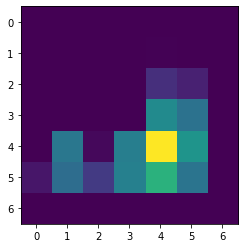

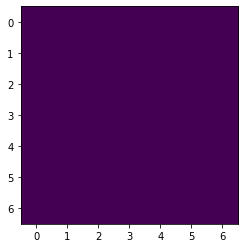

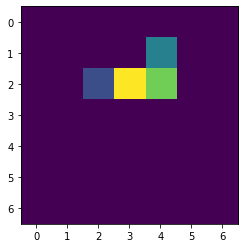

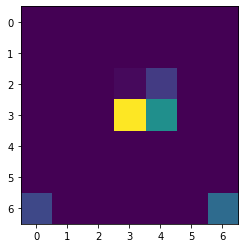

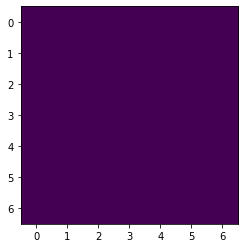

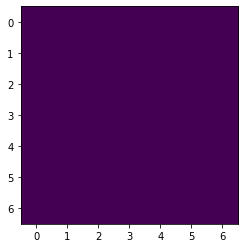

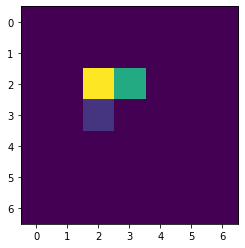

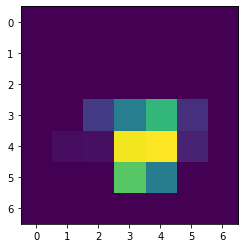

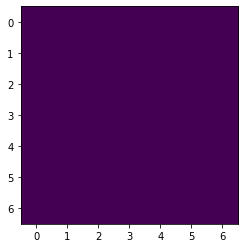

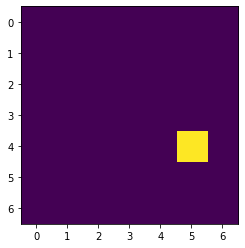

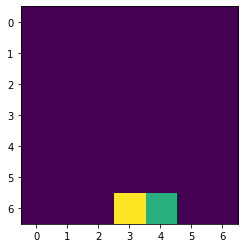

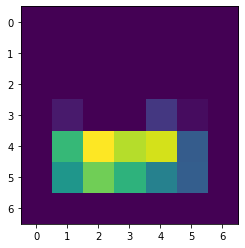

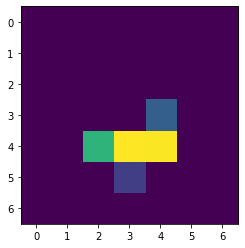

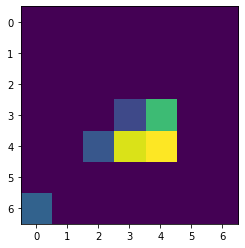

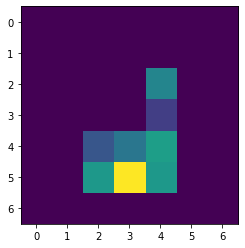

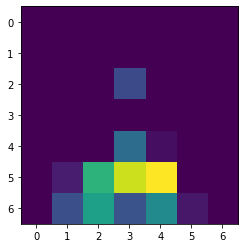

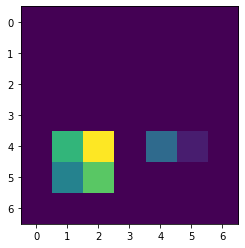

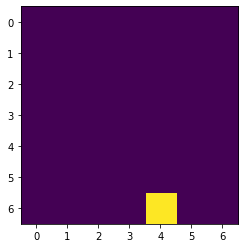

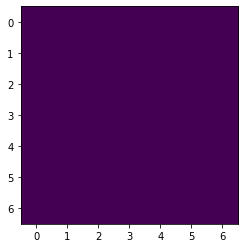

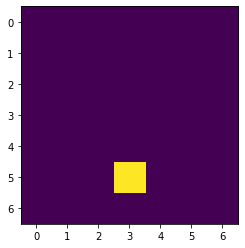

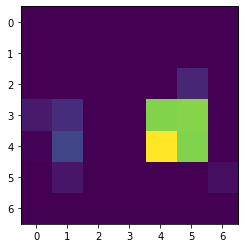

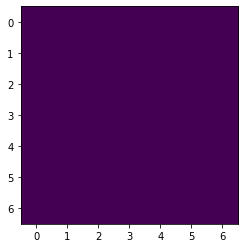

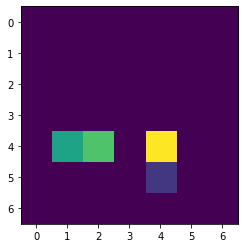

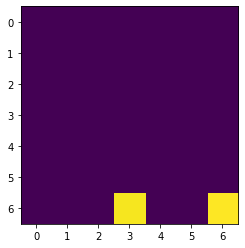

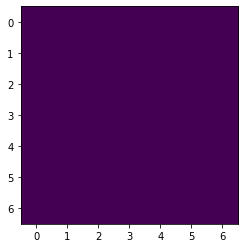

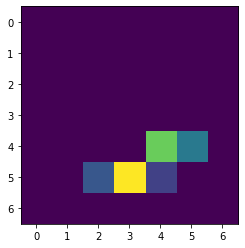

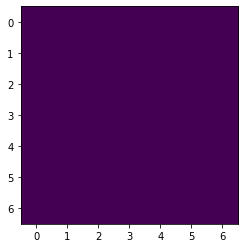

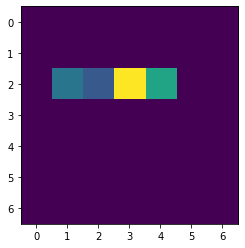

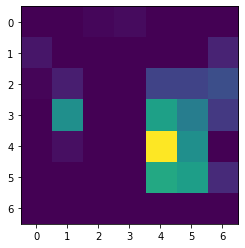

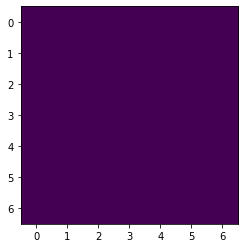

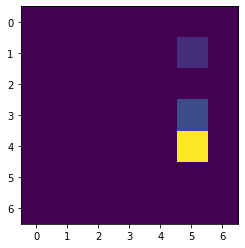

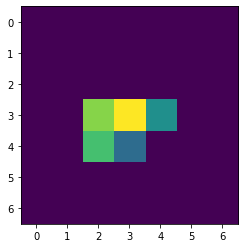

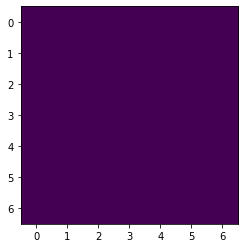

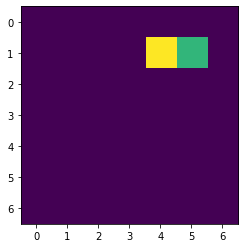

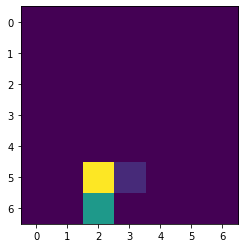

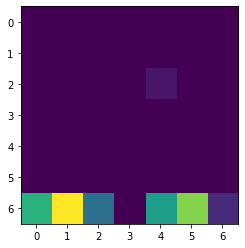

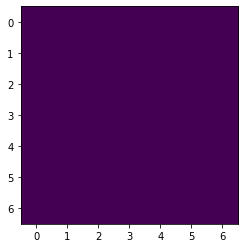

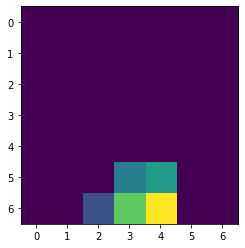

In [28]:
for i in range(50):
    fc_input_for_plot=fc_input[0,:,:,i]
    plt.imshow(fc_input_for_plot)
    plt.show()